In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp

In [134]:
import matplotlib_venn
def plot_venn_group(salexp, nsexp, sexp):
    ns_sal_size=len(set(salexp.feature_metadata.index.values).intersection(nsexp.feature_metadata.index.values))
    print('nonspecific vs. saliva: %d' % ns_sal_size)
    s_sal_size=len(set(salexp.feature_metadata.index.values).intersection(sexp.feature_metadata.index.values))
    print('specific vs. saliva: %d' % s_sal_size)

    ns_only_size = len(nsexp.feature_metadata) - ns_sal_size
    s_only_size = len(sexp.feature_metadata) - s_sal_size
    sal_only_size = len(salexp.feature_metadata) - (ns_sal_size + s_sal_size)
    
    f=plt.figure()
    print('(red) nonspecific only: %d, nonspecific-saliva: %d' % (ns_only_size, ns_sal_size))
    print('(green) specific only: %d, specific-saliva: %d' % (s_only_size, s_sal_size))
    print('(blue) saliva only: %d' % sal_only_size)
    v=matplotlib_venn.venn3({'101':ns_sal_size, '011': s_sal_size, '001':min(50,sal_only_size),
                           '010': s_only_size,
                           '100':ns_only_size},
                           set_labels=['', ''])
    aa=v.get_label_by_id('101')
    if aa is not None:
        aa.set_text('')
    v.get_label_by_id('100').set_text('')
    aa=v.get_label_by_id('011')
    if aa is not None:
        aa.set_text('')
    v.get_label_by_id('001').set_text('')
    aa=v.get_label_by_id('010')
    if aa is not None:
        aa.set_text('')
    print('Fischer-exact: %f' % sp.stats.fisher_exact([[len(sexp.feature_metadata)-s_sal_size,s_sal_size],[len(nsexp.feature_metadata)-ns_sal_size,ns_sal_size]])[1])
    return f

# Load the specific and non-specific bacteria

In [152]:
nsup=ca.read_amplicon('../ratios/nonspecific/nonspecific-up.biom','../ratios/nonspecific/nonspecific-up_sample.txt',feature_metadata_file='../ratios/nonspecific/nonspecific-up_feature.txt',normalize=None,min_reads=0)

2021-08-03 00:33:49 INFO loaded 59 samples, 31 features
2021-08-03 00:33:49 WARNING Do you forget to normalize your data? It is required before running this function
2021-08-03 00:33:49 INFO After filtering, 48 remain.


In [153]:
nsup

AmpliconExperiment with 48 samples, 31 features

In [154]:
sup=ca.read_amplicon('../ratios/ibd_specific/ibd-no-biopsies-specific.biom','../ratios/ibd_specific/ibd-no-biopsies-specific_sample.txt',feature_metadata_file='../ratios/ibd_specific/ibd-no-biopsies-specific_feature.txt',normalize=None,min_reads=0)

2021-08-03 00:33:52 INFO loaded 55 samples, 15 features
2021-08-03 00:33:52 WARNING Do you forget to normalize your data? It is required before running this function
2021-08-03 00:33:52 INFO After filtering, 43 remain.


In [155]:
sup=sup.filter_by_metadata('_calour_direction',['IBD_Crohn disease,IBD_Ulcerative Colitis'],axis='f')

In [156]:
sup

AmpliconExperiment with 43 samples, 13 features

# Compare to different saliva experiments

## Comparison of the oral microbiome in mouthwash and whole saliva samples

In [164]:
sal=ca.read_amplicon('/Users/amnon/Projects/human-saliva-mouthwash/all.biom','/Users/amnon/Projects/human-saliva-mouthwash/map.txt',min_reads=1000,normalize=10000)
sal=sal.cluster_features(10)
sal

2021-08-03 00:44:47 INFO loaded 22 samples, 677 features
2021-08-03 00:44:47 WARNING Do you forget to normalize your data? It is required before running this function
2021-08-03 00:44:47 INFO After filtering, 22 remain.
2021-08-03 00:44:47 INFO After filtering, 429 remain.


AmpliconExperiment with 22 samples, 429 features

2021-08-03 00:31:27 INFO After filtering, 176 remain.
nonspecific vs. saliva: 1
specific vs. saliva: 6
(red) nonspecific only: 30, nonspecific-saliva: 1
(green) specific only: 7, specific-saliva: 6
(blue) saliva only: 169
Fischer-exact: 0.001433


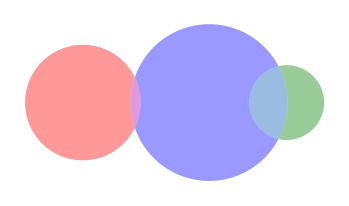

In [136]:
f=plot_venn_group(sal.filter_prevalence(0.25),nsup,sup)

2021-08-03 00:31:34 INFO After filtering, 260 remain.
nonspecific vs. saliva: 2
specific vs. saliva: 6
(red) nonspecific only: 29, nonspecific-saliva: 2
(green) specific only: 7, specific-saliva: 6
(blue) saliva only: 252
Fischer-exact: 0.004810


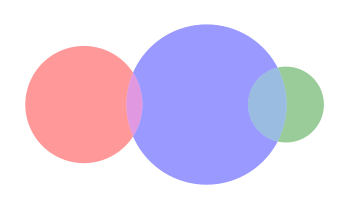

In [137]:
f=plot_venn_group(sal.filter_prevalence(0.1),nsup,sup)

## Oral microbiota of periodontal health and disease and their changes after nonsurgical periodontal therapy

In [163]:
sal=ca.read_amplicon('/Users/amnon/Projects/human-saliva-therapy/all.biom','/Users/amnon/Projects/human-saliva-therapy/map.txt',min_reads=1000,normalize=10000)
sal=sal.filter_samples('Diseased','n')
sal=sal.cluster_features(10)
sal

2021-08-03 00:44:11 INFO loaded 195 samples, 2184 features
2021-08-03 00:44:11 WARNING These have metadata but do not have data - dropped (43): {'SRR3503243', 'SRR3503246', 'SRR3503230', 'SRR3503251', 'SRR3503396', 'SRR3503390', 'SRR3503382', 'SRR3503393', 'SRR3503249', 'SRR3503392', 'SRR3503229', 'SRR3503238', 'SRR3503386', 'SRR3503237', 'SRR3503233', 'SRR3503381', 'SRR3503240', 'SRR3503241', 'SRR3503383', 'SRR3503245', 'SRR3503250', 'SRR3503242', 'SRR3503384', 'SRR3503234', 'SRR3503387', 'SRR3503394', 'SRR3503247', 'SRR3503231', 'SRR3503227', 'SRR3503228', 'SRR3503235', 'SRR3503239', 'SRR3503385', 'SRR3503388', 'SRR3503380', 'SRR3503397', 'SRR3503232', 'SRR3503395', 'SRR3503248', 'SRR3503391', 'SRR3503236', 'SRR3503244', 'SRR3503389'}
2021-08-03 00:44:11 WARNING Do you forget to normalize your data? It is required before running this function
2021-08-03 00:44:11 INFO After filtering, 195 remain.
2021-08-03 00:44:11 INFO After filtering, 716 remain.


AmpliconExperiment with 40 samples, 716 features

2021-08-03 00:31:37 INFO After filtering, 222 remain.
nonspecific vs. saliva: 4
specific vs. saliva: 6
(red) nonspecific only: 27, nonspecific-saliva: 4
(green) specific only: 7, specific-saliva: 6
(blue) saliva only: 212
Fischer-exact: 0.042995


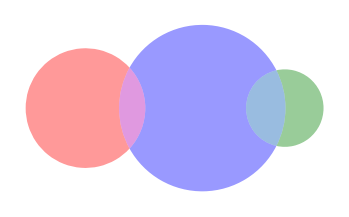

In [139]:
f=plot_venn_group(sal.filter_prevalence(0.25),nsup,sup)

2021-08-03 00:31:38 INFO After filtering, 506 remain.
nonspecific vs. saliva: 4
specific vs. saliva: 6
(red) nonspecific only: 27, nonspecific-saliva: 4
(green) specific only: 7, specific-saliva: 6
(blue) saliva only: 496
Fischer-exact: 0.042995


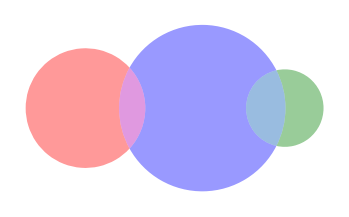

In [140]:
f=plot_venn_group(sal.filter_prevalence(0.1),nsup,sup)

## American Gut

In [157]:
ca.set_log_level('ERROR')
sal=ca.read_amplicon('/Users/amnon/Projects/ag-forpaper/ag.150.min10.16s.nobloom.withtax.biom','/Users/amnon/Projects/ag-forpaper/map.txt',min_reads=1000,normalize=10000)
ca.set_log_level('INFO')
sal=sal.filter_samples('SIMPLE_BODY_SITE','ORAL')
sal=sal.filter_samples('AGE_CAT',['teen','child','Unknown'],negate=True)
sal=sal.cluster_features(10)

2021-08-03 00:35:52 INFO After filtering, 2041 remain.


2021-08-03 00:36:22 INFO After filtering, 63 remain.
nonspecific vs. saliva: 1
specific vs. saliva: 4
(red) nonspecific only: 30, nonspecific-saliva: 1
(green) specific only: 9, specific-saliva: 4
(blue) saliva only: 58
Fischer-exact: 0.021595


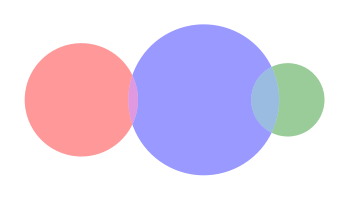

In [159]:
f=plot_venn_group(sal.filter_prevalence(0.25),nsup,sup)
f.savefig('../figures/venn-specific-nonspecific-americangut.pdf')

2021-08-03 00:32:06 INFO After filtering, 120 remain.
nonspecific vs. saliva: 2
specific vs. saliva: 5
(red) nonspecific only: 29, nonspecific-saliva: 2
(green) specific only: 8, specific-saliva: 5
(blue) saliva only: 113
Fischer-exact: 0.017050


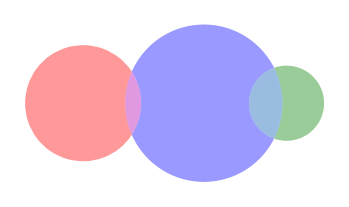

In [143]:
f=plot_venn_group(sal.filter_prevalence(0.1),nsup,sup)

## Human Salivary Amylase Gene Copy Number Impacts Oral and Gut Microbiomes

In [144]:
sal=ca.read_amplicon('/Users/amnon/Projects/human-amylase/all.biom','/Users/amnon/Projects/human-amylase/map.txt',normalize=10000,min_reads=1000)
sal=sal.filter_samples('human_oral_environmental_package','human-oral')
sal=sal.cluster_features(10)
sal

2021-08-03 00:32:06 INFO loaded 510 samples, 3727 features
2021-08-03 00:32:06 WARNING These have metadata but do not have data - dropped (10): {'ERR2640398', 'ERR2640395', 'ERR2640403', 'ERR2640336', 'ERR2640333', 'ERR2640394', 'ERR2640332', 'ERR2640396', 'ERR2640338', 'ERR2640334'}
2021-08-03 00:32:06 WARNING Do you forget to normalize your data? It is required before running this function
2021-08-03 00:32:06 INFO After filtering, 500 remain.
2021-08-03 00:32:07 INFO After filtering, 1103 remain.


AmpliconExperiment with 215 samples, 1103 features

2021-08-03 00:32:07 INFO After filtering, 171 remain.
nonspecific vs. saliva: 3
specific vs. saliva: 6
(red) nonspecific only: 28, nonspecific-saliva: 3
(green) specific only: 7, specific-saliva: 6
(blue) saliva only: 162
Fischer-exact: 0.012063


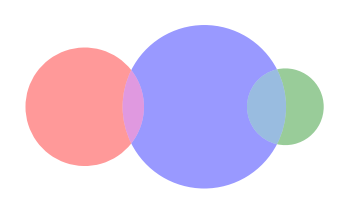

In [145]:
f=plot_venn_group(sal.filter_prevalence(0.25),nsup,sup)

## Oral Microbiota: Microbial Biomarkers of Metabolic Syndrome Independent of Host Genetic Factors

In [146]:
sal=ca.read_amplicon('/Users/amnon/Projects/human-saliva-korea-twins/all.biom','/Users/amnon/Projects/human-saliva-korea-twins/map.joined.txt',normalize=10000,min_reads=1000)
sal=sal.cluster_features(10)
sal

2021-08-03 00:32:07 INFO loaded 228 samples, 1415 features
2021-08-03 00:32:07 WARNING Do you forget to normalize your data? It is required before running this function
2021-08-03 00:32:07 INFO After filtering, 228 remain.
2021-08-03 00:32:07 INFO After filtering, 999 remain.


AmpliconExperiment with 228 samples, 999 features

2021-08-03 00:32:07 INFO After filtering, 112 remain.
nonspecific vs. saliva: 2
specific vs. saliva: 4
(red) nonspecific only: 29, nonspecific-saliva: 2
(green) specific only: 9, specific-saliva: 4
(blue) saliva only: 106
Fischer-exact: 0.052994


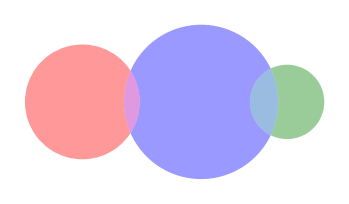

In [147]:
f=plot_venn_group(sal.filter_prevalence(0.25),nsup,sup)

2021-08-03 00:32:07 INFO After filtering, 252 remain.
nonspecific vs. saliva: 3
specific vs. saliva: 6
(red) nonspecific only: 28, nonspecific-saliva: 3
(green) specific only: 7, specific-saliva: 6
(blue) saliva only: 243
Fischer-exact: 0.012063


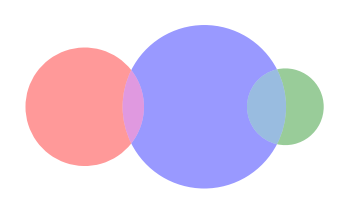

In [148]:
f=plot_venn_group(sal.filter_prevalence(0.1),nsup,sup)

## Host Genetic Control of the Oral Microbiome in Health and Disease

In [160]:
sal=ca.read_amplicon('/Users/amnon/Projects/human-saliva-genetics/all.biom','/Users/amnon/Projects/human-saliva-genetics/map.joined.txt',normalize=10000,min_reads=1000)
sal=sal.cluster_features(10)
sal

2021-08-03 00:37:27 INFO loaded 540 samples, 1263 features
2021-08-03 00:37:27 WARNING These have data but do not have metadata: {'SRR5467626', 'SRR5467685', 'SRR5467766', 'SRR5467771', 'SRR5467644', 'SRR5467523', 'SRR5467746', 'SRR5467657', 'SRR5467754', 'SRR5467653', 'SRR5467733', 'SRR5467652', 'SRR5467758', 'SRR5467784', 'SRR5467763', 'SRR5467783', 'SRR5467619', 'SRR5467762', 'SRR5467732', 'SRR5467767', 'SRR5467747', 'SRR5467759', 'SRR5467649', 'SRR5467635', 'SRR5467780', 'SRR5467775', 'SRR5467998', 'SRR5467686', 'SRR5467548', 'SRR5467625', 'SRR5467549', 'SRR5467621', 'SRR5467774', 'SRR5467532', 'SRR5467997', 'SRR5467770', 'SRR5467620', 'SRR5467755', 'SRR5467623', 'SRR5467524', 'SRR5467634', 'SRR5467740', 'SRR5467622', 'SRR5467540', 'SRR5467779', 'SRR5467544', 'SRR5467624', 'SRR5467534', 'SRR5467541', 'SRR5467648', 'SRR5467536', 'SRR5467537', 'SRR5467741', 'SRR5467645', 'SRR5467545', 'SRR5467656'}
2021-08-03 00:37:27 WARNING Do you forget to normalize your data? It is required befor

AmpliconExperiment with 534 samples, 1060 features

2021-08-03 00:37:52 INFO After filtering, 123 remain.
nonspecific vs. saliva: 1
specific vs. saliva: 4
(red) nonspecific only: 30, nonspecific-saliva: 1
(green) specific only: 9, specific-saliva: 4
(blue) saliva only: 118
Fischer-exact: 0.021595


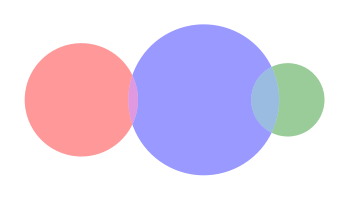

In [161]:
f=plot_venn_group(sal.filter_prevalence(0.25),nsup,sup)
f.savefig('../figures/venn-specific-nonspecific-hostgenetics.pdf')

2021-08-03 00:38:01 INFO After filtering, 226 remain.
nonspecific vs. saliva: 3
specific vs. saliva: 5
(red) nonspecific only: 28, nonspecific-saliva: 3
(green) specific only: 8, specific-saliva: 5
(blue) saliva only: 218
Fischer-exact: 0.037451


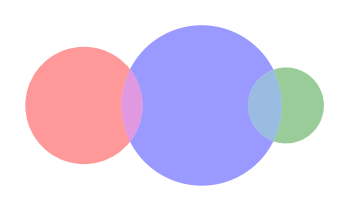

In [162]:
f=plot_venn_group(sal.filter_prevalence(0.1),nsup,sup)